In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading of data

In [24]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/HR_comma_sep.csv')

In [25]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The dataset shows employees and their data. Target attribute is whether the employee left the company or not.

In [26]:
print('The size of the dataset is ',len(df))

The size of the dataset is  14999


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Preprocessing is required.
String data is converted to integer using label encoding

In [28]:
labelEncoder = preprocessing.LabelEncoder()
df.iloc[:,8]=labelEncoder.fit_transform(df.iloc[:,8].values)
df.iloc[:,9]=labelEncoder.fit_transform(df.iloc[:,9].values)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [29]:
X=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
y=df['left']

Check if dataset is balanced

In [30]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

We can see a huge difference between count of vals in target variable, hence the dataset is highly imbalanced

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,verbose=False,learning_rate_init=0.01)
clf.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5)

In [33]:
y_pred=clf.predict(x_test)
testX = [[0.37,0.32,2,188,3,0,0,7,0]]

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2076  211]
 [  93  620]]


In [34]:
tn,fp,fn,tp=cm.ravel()
print('True Positive : ',tp)
print('True Negative : ',tn)
print('False Positive : ',fp)
print('False Negative : ',fn)

True Positive :  620
True Negative :  2076
False Positive :  211
False Negative :  93


In [35]:
recall=(tp)/(tp+fn)
print("Recall: ",recall)

specificity=(tn)/(fp+tn)
print("Specificity: ",specificity)

precision=(tp)/(tp+fp)
print("Precision: ",precision)

npv=(tn)/(fn+tn)
print("NPV: ",npv)

f1_score=(2*precision*recall)/(precision+recall)
print("F1Score: ",f1_score)

mcc=(tp*tn-fp*fn)/(np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print("MCC: ",mcc)

from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,y_pred)
print("ROC AUC Score: ",roc)

Recall:  0.8695652173913043
Specificity:  0.9077393965894185
Precision:  0.7460890493381468
NPV:  0.9571230982019364
F1Score:  0.8031088082901554
MCC:  0.7393308101859406
ROC AUC Score:  0.8886523069903614


In [36]:
testpred=clf.predict(testX)
print("testpred is :", testpred)
if testpred == 0: 
  print("Employee will stay")
else:
  print("Employee will leave")

testpred is : [1]
Employee will leave


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


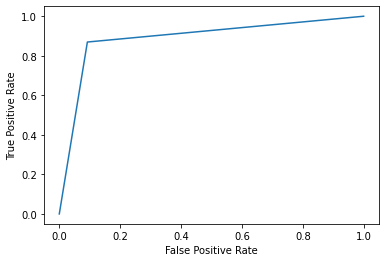

In [37]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Inference : Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers—the input layer, output layer and hidden layer. MLPs are useful in research for their ability to solve problems stochastically, which often allows approximate solutions for extremely complex problems like fitness approximation.